In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Euclidean distance

In [3]:
# Let a vector V
V = np.array([[7,4],[3,7]])
V

array([[7, 4],
       [3, 7]])

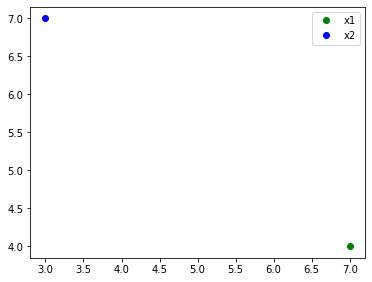

In [4]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect(1)
plt.plot(V[0,0],V[0,1],'ro',c='green',label="x1")
plt.plot(V[1,0],V[1,1],'ro',c='blue',label="x2")
plt.legend()
plt.show()

* How to calculate the distance between the points?

* If we add a 3rd point, how do we know if it is closer to one of the 2 existing points?

Using the Pythagor theorem:

$$Distance(p,q)^2 = (q_x-p_x)^2+(q_y-p_y)^2 $$

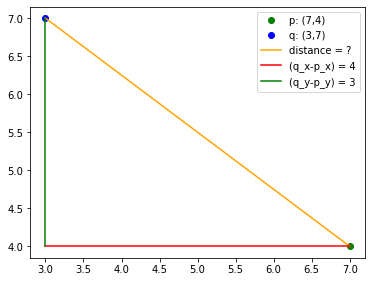

In [5]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect(1)

# Using Pythagor's theorem
plt.plot(V[0,0],V[0,1],'ro',c='green',label="p: (7,4)")
plt.plot(V[1,0],V[1,1],'ro',c='blue',label="q: (3,7)")

plt.plot(V[:,0],V[:,1], c='orange', label="distance = ?")
plt.plot(V[:,0],[4,4], c='red', label="(q_x-p_x) = 4")
plt.plot([3,3],V[:,1], c='green',label="(q_y-p_y) = 3")
plt.legend()
plt.show()

Euclidean Distance: $$\sqrt{\sum_{i=1}^m(p_i-q_i)^2}$$
where $m=2$ in 2 dimensions

In [6]:
# Euclidean Distance between 2 points
diff = V[0,:]-V[1,:]
diff_2 = diff**2
sum_diff = diff_2.sum()
d_euclide = np.sqrt(sum_diff)


print(f"Square Root of (the Sum of Squared Difference of v1 and v2) = {d_euclide}")

Square Root of (the Sum of Squared Difference of v1 and v2) = 5.0


In [7]:
def euclid_distance(x,y):
    return np.sqrt(((x-y)**2).sum())

euclid_distance(V[0,:],V[1,:])

5.0

# Example

## Find the closest point from the origine $O(n)$

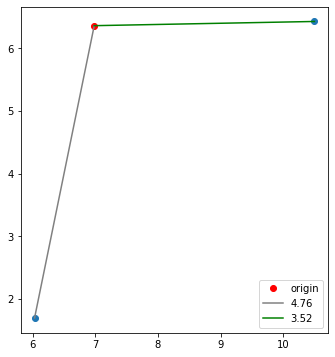

In [8]:
# Generate a list of points
np.random.seed(11)
X = np.random.normal(7, 2, size=(3, 2))

# Select a starting point from wich we want to know 
# the shortest distance with others points
p = X[-1]
X = X[:-1]

# Plot all points
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect(1)
plt.scatter(X[:,0],X[:,1])
plt.plot(p[0],p[1],'ro',c='red',label="origin")

# Search for the shortest distance (heavy method O(n))
d_min = np.inf
closest = np.array([0,0])
for x in X:
    d_test = euclid_distance(p,x)
    if(d_test<=d_min):
        d_min=d_test
        closest = x
    else:
        plt.plot([p[0],x[0]],[p[1],x[1]],c='gray',label=round(d_test,2))
# print the closest        
plt.plot([p[0],closest[0]],[p[1],closest[1]],c='green',label=round(d_min,2))
        
plt.legend()
plt.show()

# Vectorized version

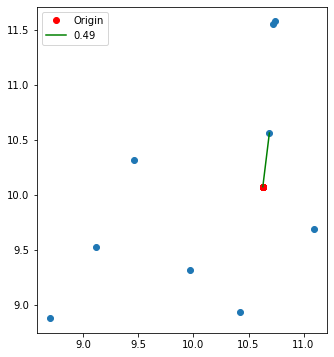

In [9]:
def euclid_distance_v(X,Y):
    squared_diff = np.square(X-Y)
    sum_squared_diff = np.sum(squared_diff,axis=1)
    return np.sqrt(sum_squared_diff)

# Generate a list of n points
number_of_points = 10 
#np.random.seed(0)
X = np.random.normal(10, 1, size=(number_of_points, 2))

# Choose a starting point O from which you want to know 
# the shortest distance to the other points. 
# Build a vector P with the appropriate shape based on X
P = np.full((number_of_points-1,2),X[-1])
# Remove point O from vector X (cosmetic)
X = X[:-1]

# Plot all points
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect(1)
plt.scatter(X[:,0],X[:,1])
plt.plot(P[:,0],P[:,1],'ro',c='red',label="Origin")

# Compute distance for vectors
D = euclid_distance_v(P,X)
# keep index of closest the point
closest_index = np.argmin(D)

# plot each lines
#plt.plot([P[:,0],X[:,0]],[P[:,1],X[:,1]],c='gray')

# print the shortest distance        
plt.plot([P[0,0],X[closest_index,0]],[P[0,1],X[closest_index,1]],c='green',label=round(D[closest_index],2))
        
plt.legend()
plt.show()